In [1]:
# 32 Hugging Face Pipelines ['audio-classification', 'automatic-speech-recognition', 'conversational', 'depth-estimation', 'document-question-answering', 'feature-extraction', 'fill-mask', 'image-classification', 'image-feature-extraction', 'image-segmentation', 'image-to-image', 'image-to-text', 'mask-generation', 'ner', 'object-detection', 'question-answering', 'sentiment-analysis', 'summarization', 'table-question-answering', 'text-classification', 'text-generation', 'text-to-audio', 'text-to-speech', 'text2text-generation', 'token-classification', 'translation', 'video-classification', 'visual-question-answering', 'vqa', 'zero-shot-audio-classification', 'zero-shot-classification', 'zero-shot-image-classification', 'zero-shot-object-detection', 'translation_XX_to_YY']"
# Code and Corrections assisted by ChatGPT 4o and Hugging Face 02Jul24

In [2]:
! pip install transformers datasets accelerate simpleaudio torchaudio timm av sentencepiece torch diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1

In [3]:
from transformers import pipeline

classifier = pipeline('text-classification', model = "distilbert/distilbert-base-uncased-finetuned-sst-2-english")
result = classifier("I love using Hugging Face transformers!")
print(result)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9971315860748291}]


In [4]:
from transformers import pipeline

ner = pipeline('ner', model = "dbmdz/bert-large-cased-finetuned-conll03-english")
result = ner("My name is Sarah and I live in London.")
print(result)

config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

[{'entity': 'I-PER', 'score': 0.9976598, 'index': 4, 'word': 'Sarah', 'start': 11, 'end': 16}, {'entity': 'I-LOC', 'score': 0.99831945, 'index': 9, 'word': 'London', 'start': 31, 'end': 37}]


In [5]:
from transformers import pipeline

qa = pipeline('question-answering', model = "distilbert/distilbert-base-cased-distilled-squad")
result = qa(question="Where do I live?", context="My name is Sarah and I live in London.")
print(result)

config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'score': 0.9736034870147705, 'start': 31, 'end': 37, 'answer': 'London'}


In [6]:
from transformers import pipeline

translator = pipeline('translation_en_to_fr', model = "google-t5/t5-base")
result = translator("Hugging Face is a great platform for NLP.")
print(result)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

[{'translation_text': 'Hugging Face est une excellente plateforme pour la LNP.'}]


In [7]:
from transformers import pipeline

# Initialize the translation pipeline with a specific model
translator = pipeline('translation', model='Helsinki-NLP/opus-mt-en-de')

# Use the pipeline
result = translator("Hugging Face is creating amazing tools for NLP.")
print(result)

config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


[{'translation_text': 'Hugging Face schafft erstaunliche Werkzeuge für NLP.'}]


In [8]:
from transformers import pipeline

summarizer = pipeline('summarization', model = "sshleifer/distilbart-cnn-12-6")
result = summarizer("Hugging Face is creating a tool that democratizes AI by making state-of-the-art models available to everyone. This allows for rapid experimentation and faster progress in the field of AI.")
print(result)

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Your max_length is set to 142, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[{'summary_text': ' Hugging Face is creating a tool that democratizes AI by making state-of-the-art models available to everyone . This allows for rapid experimentation and faster progress in the field of AI . Hugging face is creating an AI tool that allows rapid experimentation, faster progress .'}]


In [9]:
from transformers import pipeline

generator = pipeline('text-generation', model = "openai-community/gpt2")
result = generator("Once upon a time, in a land far, far away,")
print(result)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Once upon a time, in a land far, far away, something seemed to happen when a black cloud fell over this land, like a whirlwind of blood. The man with the dark armor stood there trembling, his body shaking, on his knees.'}]


In [10]:
from transformers import pipeline

fill_mask = pipeline('fill-mask', model = "distilbert/distilroberta-base")
result = fill_mask("Hugging Face is creating a <mask> tool for NLP.")
print(result)

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[{'score': 0.05542315915226936, 'token': 38228, 'token_str': ' visualization', 'sequence': 'Hugging Face is creating a visualization tool for NLP.'}, {'score': 0.026940960437059402, 'token': 92, 'token_str': ' new', 'sequence': 'Hugging Face is creating a new tool for NLP.'}, {'score': 0.022548044100403786, 'token': 32209, 'token_str': ' workflow', 'sequence': 'Hugging Face is creating a workflow tool for NLP.'}, {'score': 0.01883717067539692, 'token': 2247, 'token_str': ' powerful', 'sequence': 'Hugging Face is creating a powerful tool for NLP.'}, {'score': 0.0176524817943573, 'token': 15625, 'token_str': ' companion', 'sequence': 'Hugging Face is creating a companion tool for NLP.'}]


In [11]:
from transformers import pipeline

text2text_generator = pipeline('text2text-generation', model = "google-t5/t5-base")
result = text2text_generator("Translate English to German: Hugging Face is great.")
print(result)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'Hugging Gesicht ist großartig.'}]


In [12]:
from transformers import pipeline

zero_shot_classifier = pipeline('zero-shot-classification', model = "facebook/bart-large-mnli")
result = zero_shot_classifier("Hugging Face is a great company.", candidate_labels=["technology", "finance", "education"])
print(result)

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'Hugging Face is a great company.', 'labels': ['technology', 'finance', 'education'], 'scores': [0.7969775795936584, 0.12525086104869843, 0.07777152955532074]}


In [13]:
from transformers import pipeline, Conversation

conversational = pipeline('conversational', model = "microsoft/DialoGPT-medium")
conversation = Conversation("Hello, how are you?")
result = conversational(conversation)
print(result)

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/863M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Conversation id: 19e36040-b43a-46a0-b456-f1895306bd0d
user: Hello, how are you?
assistant: I'm good, how are you?



In [14]:
from transformers import pipeline

feature_extractor = pipeline('feature-extraction', model = "distilbert/distilbert-base-cased")
result = feature_extractor("Hugging Face is great for NLP.")
print(result)

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

[[[0.49298444390296936, 0.05027804896235466, 0.0890398770570755, -0.3231028616428375, -0.31149792671203613, -0.04537973180413246, 0.2649490535259247, -0.13777440786361694, 0.015373715199530125, -1.040079951286316, -0.2048969268798828, 0.052333440631628036, -0.13171163201332092, -0.1020217165350914, -0.43320366740226746, 0.12892849743366241, 0.21657857298851013, 0.1678975224494934, -0.0550340935587883, -0.1290489137172699, 0.07956112176179886, -0.30887526273727417, 0.5823299288749695, -0.28044435381889343, 0.20220056176185608, 0.06954611837863922, 0.27439501881599426, 0.21290630102157593, -0.24682871997356415, 0.4622601866722107, -0.17250314354896545, 0.2762959599494934, -0.10974032431840897, 0.14419370889663696, -0.3146379888057709, 0.17768323421478271, -0.0050141578540205956, -0.4142329692840576, -0.06829530745744705, -0.14821137487888336, -0.2798387110233307, 0.32136017084121704, 0.5362632870674133, -0.18042786419391632, 0.03253503143787384, -0.6541780233383179, 0.09937231987714767, 

In [16]:
from transformers import pipeline

image_to_text = pipeline('image-to-text', model = "ydshieh/vit-gpt2-coco-en")
result = image_to_text("/content/image1.png")
print(result)

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


[{'generated_text': 'a series of photos showing different types of scissors '}]


In [17]:
from transformers import pipeline

image_classifier = pipeline('image-classification', model ="google/vit-base-patch16-224")
result = image_classifier("/content/image1.png")
print(result)

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

[{'label': 'web site, website, internet site, site', 'score': 0.9869363903999329}, {'label': 'menu', 'score': 0.0028380088042467833}, {'label': 'binder, ring-binder', 'score': 0.001305207028053701}, {'label': 'book jacket, dust cover, dust jacket, dust wrapper', 'score': 0.0010340134613215923}, {'label': 'screen, CRT screen', 'score': 0.0006645927205681801}]


In [18]:
from transformers import pipeline

object_detector = pipeline('object-detection', model = "facebook/detr-resnet-50")
result = object_detector("/content/image1.png")
print(result)

config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

[]


In [19]:
from transformers import pipeline

image_segmenter = pipeline('image-segmentation', model = "facebook/detr-resnet-50-panoptic")
result = image_segmenter("/content/image1.png")
print(result)

config.json:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/172M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForSegmentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

`label_ids_to_fuse` unset. No instance will be fused.


[]


In [20]:
from transformers import pipeline
from PIL import Image

pipe = pipeline("document-question-answering", model="naver-clova-ix/donut-base-finetuned-docvqa")

question = "What is the purchase amount?"
image = Image.open("/content/image1.png")

pipe(image=image, question=question)

config.json:   0%|          | 0.00/4.74k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/803M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.01M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/478 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/359 [00:00<?, ?B/s]

[{'answer': '24%'}]

In [21]:
from transformers import pipeline

asr = pipeline('automatic-speech-recognition', model = "facebook/wav2vec2-base-960h")
result = asr("/content/clip1.mp3")
print(result)

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You sho

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

{'text': 'OOO O AO AN E O TEN O AT TON AN ANNO'}


In [22]:
from transformers import pipeline

audio_classifier = pipeline('audio-classification', model = "superb/wav2vec2-base-superb-ks")
result = audio_classifier("/content/clip1.mp3")
print(result)

config.json:   0%|          | 0.00/2.42k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:364: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of the model checkpoint at superb/wav2vec2-base-superb-ks were not used when initializing Wav2Vec2ForSequenceClassification: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at superb/wav2vec2-base-superb-ks and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_em

preprocessor_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

[{'score': 0.8980591297149658, 'label': 'on'}, {'score': 0.07450558990240097, 'label': 'go'}, {'score': 0.01734091155230999, 'label': 'down'}, {'score': 0.00707003939896822, 'label': '_unknown_'}, {'score': 0.0014767154352739453, 'label': 'up'}]


In [23]:
from transformers import pipeline

# Initialize the depth-estimation pipeline with a specific model
depth_estimator = pipeline('depth-estimation', model='Intel/dpt-large')

# Use the pipeline
result = depth_estimator("/content/image1.png")
print(result)

config.json:   0%|          | 0.00/942 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

{'predicted_depth': tensor([[[ 9.6121,  9.5961,  9.5884,  ..., 10.9657, 11.0265, 10.8361],
         [ 9.6305,  9.6197,  9.6121,  ..., 11.0355, 11.0239, 11.0424],
         [ 9.6203,  9.6534,  9.6273,  ..., 11.0954, 11.1055, 11.0750],
         ...,
         [16.0833, 16.1606, 16.1547,  ..., 18.4163, 18.4019, 18.3907],
         [16.2048, 16.2189, 16.2317,  ..., 18.3570, 18.3739, 18.4627],
         [16.2293, 16.2395, 16.2392,  ..., 18.4307, 18.4517, 18.4947]]]), 'depth': <PIL.Image.Image image mode=L size=1976x1307 at 0x77FBE4A49DE0>}


In [24]:
from transformers import pipeline

# Initialize the image-feature-extraction pipeline with a specific model
feature_extractor = pipeline('image-feature-extraction', model='google/vit-base-patch16-224')

# Use the pipeline
result = feature_extractor("/content/image1.png")
print(result)

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[[[-1.1718579530715942, 0.12562282383441925, -0.1869145780801773, -0.9268450736999512, -1.6179598569869995, -0.3936772346496582, -0.7293630838394165, 0.0017162775620818138, -0.176317498087883, -1.163517713546753, -0.3545653223991394, 3.085599660873413, 0.6428285241127014, 0.5416253209114075, -0.7955905199050903, 0.2732221782207489, 0.3844357430934906, 0.6975181698799133, -0.05107847973704338, -0.17869339883327484, -0.5801864266395569, -0.2592969536781311, 1.0331000089645386, -0.2170019894838333, -0.6013283133506775, -1.0674718618392944, 0.7344989776611328, -1.208988904953003, 0.8223620057106018, 0.05435949191451073, -0.6874340176582336, 0.34434595704078674, 0.27759072184562683, -2.5195095539093018, 0.14652730524539948, -0.2271728664636612, -0.7152231335639954, -0.6398952603340149, 0.28438761830329895, -0.3830234706401825, 0.5206984877586365, 1.4539223909378052, -1.063547968864441, -0.6702972054481506, 0.6011602282524109, 0.41619694232940674, 0.8684438467025757, -0.3133881092071533, 0.3

In [25]:
from transformers import pipeline

# Initialize the mask-generation pipeline with a specific model
mask_generator = pipeline('mask-generation', model='facebook/sam-vit-base')

# Use the pipeline
result = mask_generator("/content/image1.png")
print(result)

config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/375M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

{'masks': [array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False

In [26]:
from transformers import pipeline

# Initialize the sentiment-analysis pipeline with a specific model
sentiment_analyzer = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# Use the pipeline
result = sentiment_analyzer("I love using Hugging Face transformers!")
print(result)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9971315860748291}]


In [27]:
from transformers import pipeline
import pandas as pd

# prepare table + question
data = {"Actors": ["Brad Pitt", "Leonardo Di Caprio", "George Clooney"], "Number of movies": ["87", "53", "69"]}
table = pd.DataFrame.from_dict(data)
question = "how many movies does Leonardo Di Caprio have?"

# pipeline model
# Note: you must to install torch-scatter first.
tqa = pipeline(task="table-question-answering", model="google/tapas-large-finetuned-wtq")

# result

print(tqa(table=table, query=question)['cells'][0])

config.json:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.35G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/490 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/262k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/154 [00:00<?, ?B/s]

53


In [28]:
# Use a pipeline as a high-level helper
from transformers import pipeline
pipe = pipeline("token-classification", model="Clinical-AI-Apollo/Medical-NER", aggregation_strategy='simple')
result = pipe('45 year old woman diagnosed with CAD')

# Load model directly
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("Clinical-AI-Apollo/Medical-NER")
model = AutoModelForTokenClassification.from_pretrained("Clinical-AI-Apollo/Medical-NER")

config.json:   0%|          | 0.00/5.14k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/736M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [29]:
from transformers import pipeline

# Initialize the visual-question-answering pipeline with a specific model
vqa = pipeline('visual-question-answering', model='dandelin/vilt-b32-finetuned-vqa')

# Use the pipeline
result = vqa(image="/content/image1.png", question="What is in the picture?")
print(result)

config.json:   0%|          | 0.00/136k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/470M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/251 [00:00<?, ?B/s]

[{'score': 0.24118740856647491, 'answer': 'flag'}, {'score': 0.07810406386852264, 'answer': 'flags'}, {'score': 0.07561173290014267, 'answer': 'american flag'}, {'score': 0.06493393331766129, 'answer': 'words'}, {'score': 0.04170616343617439, 'answer': 'sign'}]


In [30]:
from transformers import pipeline

# Initialize the zero-shot-image-classification pipeline with a specific model
zero_shot_image = pipeline('zero-shot-image-classification', model='openai/clip-vit-base-patch32')

# Use the pipeline
result = zero_shot_image("/content/image1.png", candidate_labels=["a photo of a cat", "a photo of a dog"])
print(result)

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

[{'score': 0.9318545460700989, 'label': 'a photo of a dog'}, {'score': 0.06814541667699814, 'label': 'a photo of a cat'}]


In [31]:
from transformers import pipeline

# Initialize the zero-shot-object-detection pipeline with a specific model
zero_shot_object = pipeline('zero-shot-object-detection', model='google/owlvit-base-patch32')

# Use the pipeline
result = zero_shot_object("/content/image1.png", candidate_labels=["cat", "dog", "person"])
print(result)

config.json:   0%|          | 0.00/4.42k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/613M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

[]


In [32]:
from transformers import pipeline
import torchaudio
import numpy as np

# Load the MP3 file
file_path = "/content/clip1.mp3"
waveform, sample_rate = torchaudio.load(file_path)

# Convert the waveform to a numpy array and ensure it's a single channel (mono)
waveform = waveform.numpy()[0]

# Initialize the zero-shot-audio-classification pipeline with a specific model
classifier = pipeline(task="zero-shot-audio-classification", model="laion/clap-htsat-unfused")

# Perform classification
result = classifier(waveform, candidate_labels=["Sound of a dog", "Sound of vacuum cleaner"])
print(result)

config.json:   0%|          | 0.00/5.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/615M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

[{'score': 0.8083412051200867, 'label': 'Sound of a dog'}, {'score': 0.19165873527526855, 'label': 'Sound of vacuum cleaner'}]


In [33]:
from transformers import pipeline
from datasets import load_dataset
import soundfile as sf
import torch

synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts")

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")
speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)
# You can replace this embedding with your own as well.

speech = synthesiser("Hello, my dog is cooler than you!", forward_params={"speaker_embeddings": speaker_embedding})

sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

Generating validation split:   0%|          | 0/7931 [00:00<?, ? examples/s]

In [34]:
from transformers import pipeline

# Initialize the video-classification pipeline with a specific model
video_classifier = pipeline('video-classification', model='MCG-NJU/videomae-base-finetuned-kinetics')

# Use the pipeline
result = video_classifier("/content/videoclip1.mp4")
print(result)

config.json:   0%|          | 0.00/22.9k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/feature_extraction_utils.py:141: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  return torch.tensor(value)


[{'score': 0.14573565125465393, 'label': 'digging'}, {'score': 0.14062662422657013, 'label': 'driving car'}, {'score': 0.08418222516775131, 'label': 'building shed'}, {'score': 0.0403132438659668, 'label': 'paragliding'}, {'score': 0.035946328192949295, 'label': 'catching or throwing frisbee'}]


model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

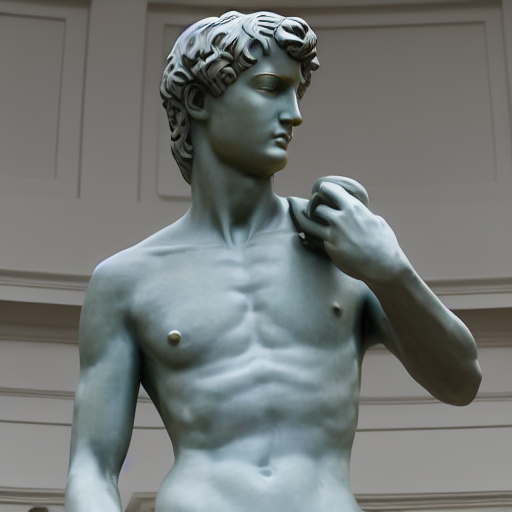

In [35]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

url = "https://raw.githubusercontent.com/timothybrooks/instruct-pix2pix/main/imgs/example.jpg"
def download_image(url):
    image = PIL.Image.open(requests.get(url, stream=True).raw)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image
image = download_image(url)

prompt = "modernize statue"
images = pipe(prompt, image=image, num_inference_steps=10, image_guidance_scale=1).images
images[0]